#Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('Dataset El Nino & La Nina - FIX.csv')

In [ ]:
df.head()

,weather_code,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max,label
0,63.0,31.0,24.9,33224.84,20.6,20.6,16.3,la nina
1,65.0,30.2,25.1,22994.60,10.9,10.9,13.0,la nina
2,53.0,30.1,25.5,27612.70,1.7,1.7,8.7,la nina
3,63.0,29.1,25.4,20388.78,6.9,6.9,9.9,la nina
4,63.0,30.4,25.3,35931.55,11.4,11.4,7.4,la nina


In [ ]:
df.shape

(21303, 8)

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 weather_code           2
temperature_2m_max     2
temperature_2m_mean    4
sunshine_duration      4
precipitation_sum      4
rain_sum               4
wind_speed_10m_max     2
label                  0
dtype: int64


In [ ]:
df['label'].value_counts()

,count
label,
el nino,11667
la nina,9636


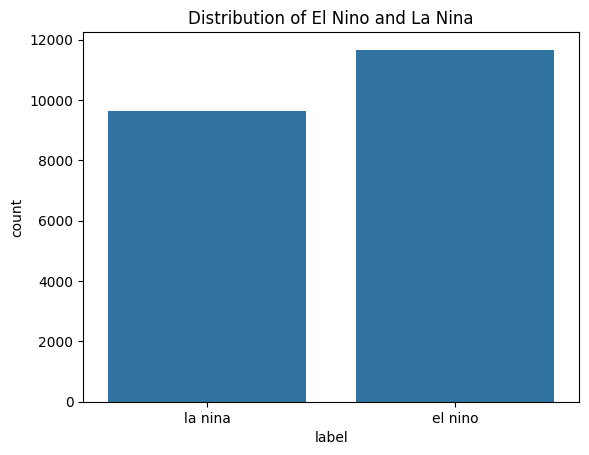

In [ ]:
# Visualize the distribution of the target variable (label)
sns.countplot(x='label', data=df)
plt.title("Distribution of El Nino and La Nina")
plt.show()

In [ ]:
# Analyze characteristics of each label
el_nino_stats = df[df['label'] == 'el nino'].describe()
la_nina_stats = df[df['label'] == 'la nina'].describe()

In [ ]:
print("\nCharacteristics of El Nino:\n", el_nino_stats)
print("\nCharacteristics of La Nina:\n", la_nina_stats)


Characteristics of El Nino:
        weather_code  temperature_2m_max  temperature_2m_mean  \
count  11665.000000        11665.000000         11663.000000   
mean      43.904243           29.538714            25.205916   
std       24.795339            2.579188             1.808166   
min        0.000000           20.300000            17.300000   
25%        3.000000           27.900000            24.300000   
50%       53.000000           29.400000            25.400000   
75%       63.000000           31.200000            26.400000   
max       65.000000           38.900000            30.400000   

       sunshine_duration  precipitation_sum      rain_sum  wind_speed_10m_max  
count       11663.000000       11663.000000  11663.000000        11665.000000  
mean        35297.194067           5.970093      5.970093           10.151453  
std          8018.063348           8.569640      8.569640            3.914212  
min             0.000000           0.000000      0.000000            2.20

In [ ]:
# Perform t-tests and calculate ranges to identify significant differences between labels
features = ['temperature_2m_max', 'temperature_2m_mean', 'sunshine_duration',
            'precipitation_sum', 'rain_sum', 'wind_speed_10m_max']

t_test_results = {}
feature_ranges = {}

In [ ]:
for feature in features:
    t_stat, p_value = ttest_ind(
        df[df['label'] == 'el nino'][feature],
        df[df['label'] == 'la nina'][feature],
        nan_policy='omit'
    )
    el_nino_range = (df[df['label'] == 'el nino'][feature].min(), df[df['label'] == 'el nino'][feature].max())
    la_nina_range = (df[df['label'] == 'la nina'][feature].min(), df[df['label'] == 'la nina'][feature].max())
    t_test_results[feature] = {'t_stat': t_stat, 'p_value': p_value}
    feature_ranges[feature] = {'El Nino Range': el_nino_range, 'La Nina Range': la_nina_range}

In [ ]:
# Sort features by p-value
sorted_results = sorted(t_test_results.items(), key=lambda x: x[1]['p_value'])

print("\nT-Test Results with Ranges (sorted by significance):")
for feature, result in sorted_results:
    el_nino_range = feature_ranges[feature]['El Nino Range']
    la_nina_range = feature_ranges[feature]['La Nina Range']
    print(f"{feature}: t_stat = {result['t_stat']:.2f}, p_value = {result['p_value']:.2e}, "
          f"El Nino Range = {el_nino_range}, La Nina Range = {la_nina_range}")


T-Test Results with Ranges (sorted by significance):
temperature_2m_max: t_stat = 73.07, p_value = 0.00e+00, El Nino Range = (20.3, 38.9), La Nina Range = (16.7, 35.1)
temperature_2m_mean: t_stat = 76.85, p_value = 0.00e+00, El Nino Range = (17.3, 30.4), La Nina Range = (15.5, 28.3)
sunshine_duration: t_stat = 30.44, p_value = 3.04e-199, El Nino Range = (0.0, 42812.58), La Nina Range = (0.0, 42791.39)
wind_speed_10m_max: t_stat = 27.57, p_value = 2.12e-164, El Nino Range = (2.2, 32.7), La Nina Range = (2.9, 31.0)
precipitation_sum: t_stat = -19.96, p_value = 8.26e-88, El Nino Range = (0.0, 141.1), La Nina Range = (0.0, 161.0)
rain_sum: t_stat = -19.96, p_value = 8.26e-88, El Nino Range = (0.0, 141.1), La Nina Range = (0.0, 161.0)


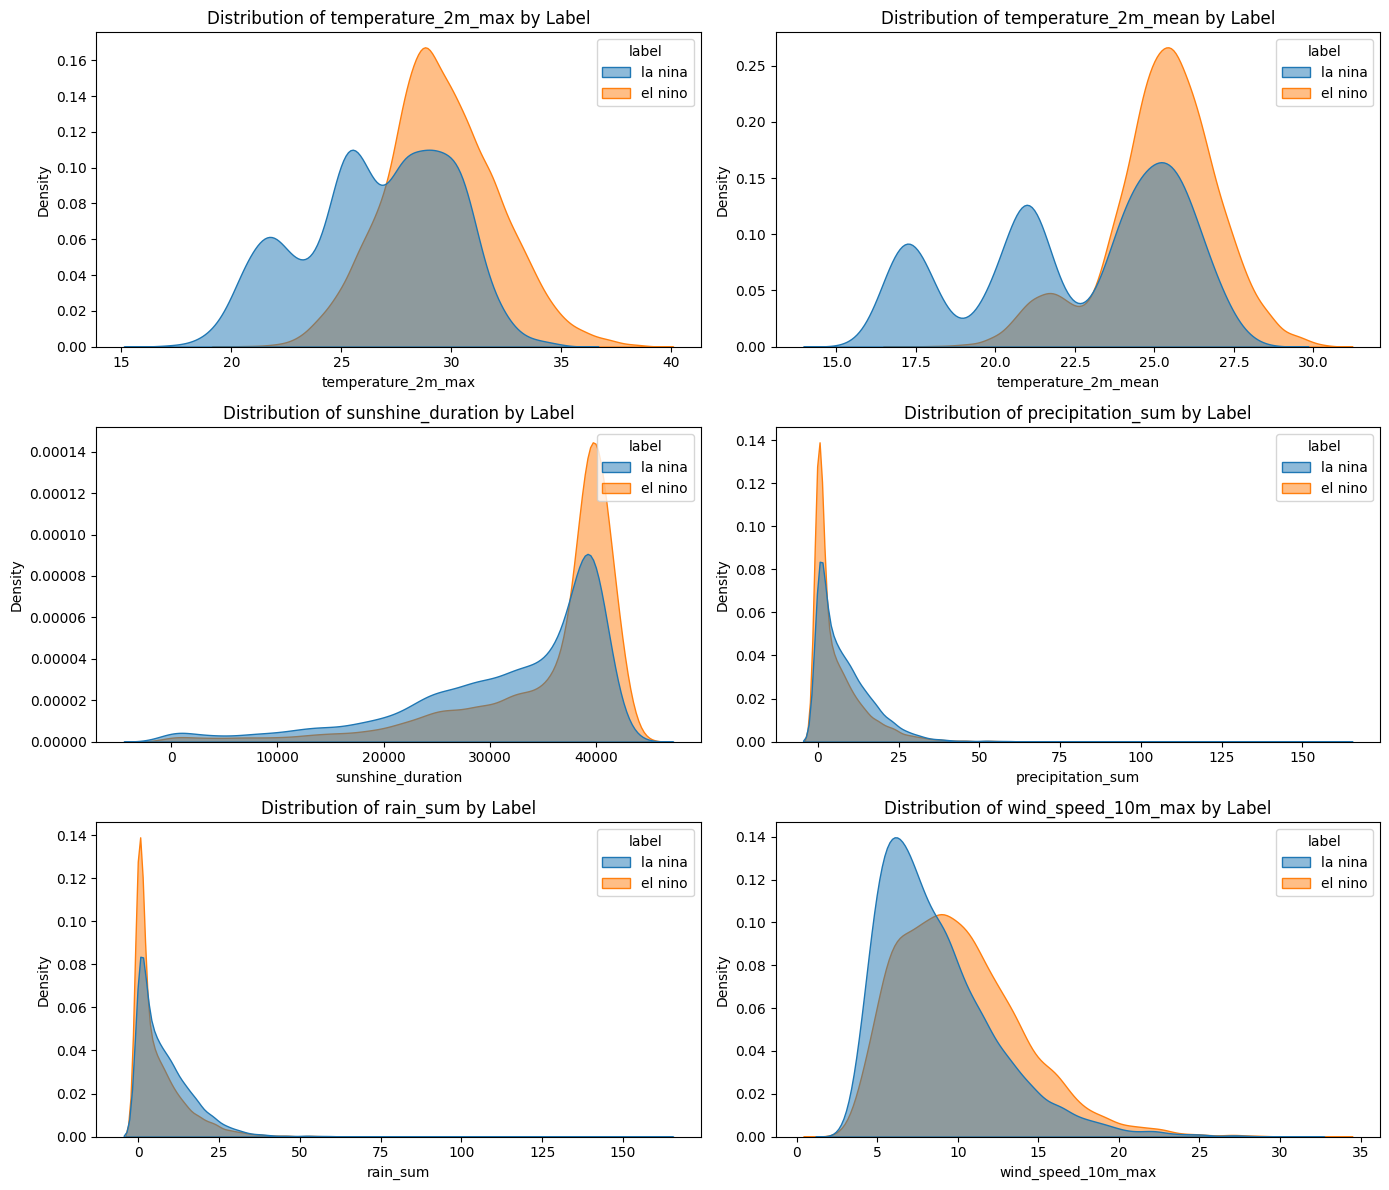

In [ ]:
# Visualize feature distributions by label in subplots
plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=feature, hue='label', fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature} by Label")
plt.tight_layout()
plt.show()

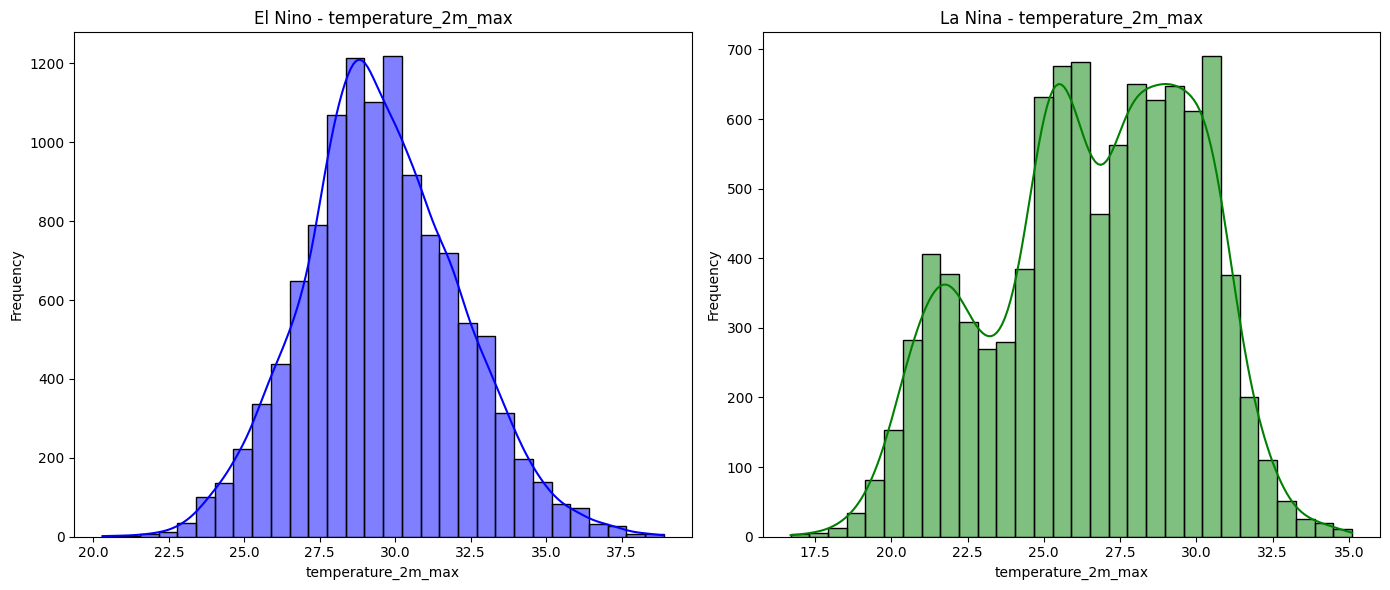

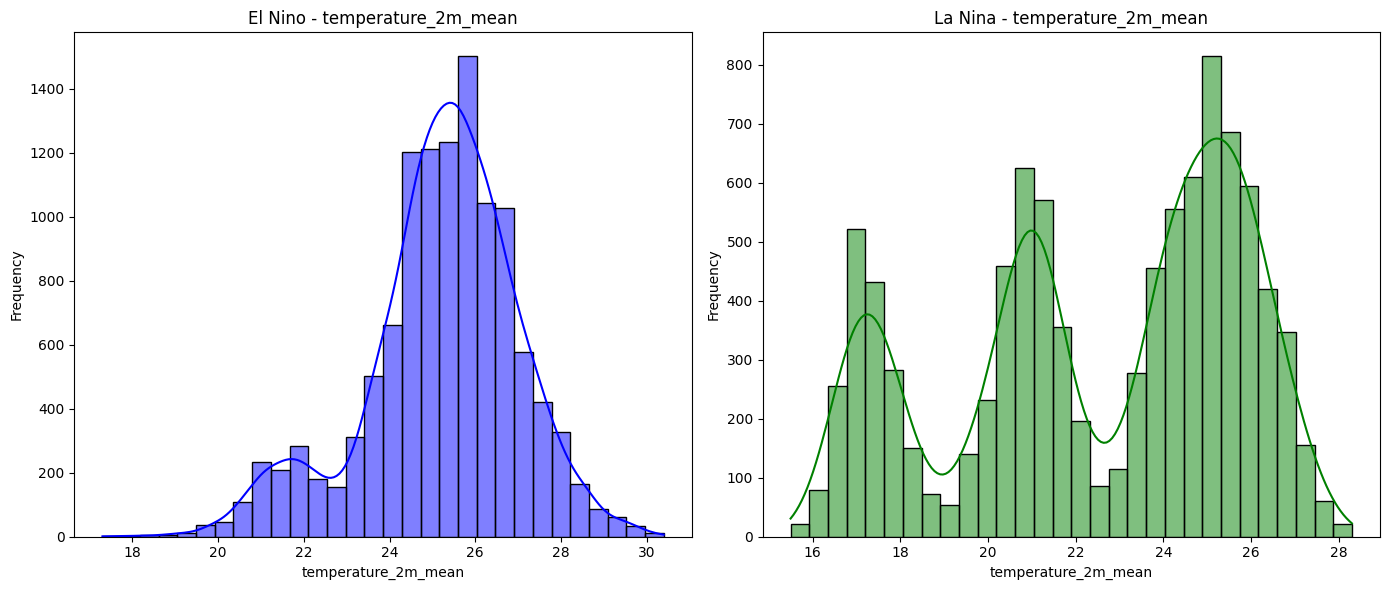

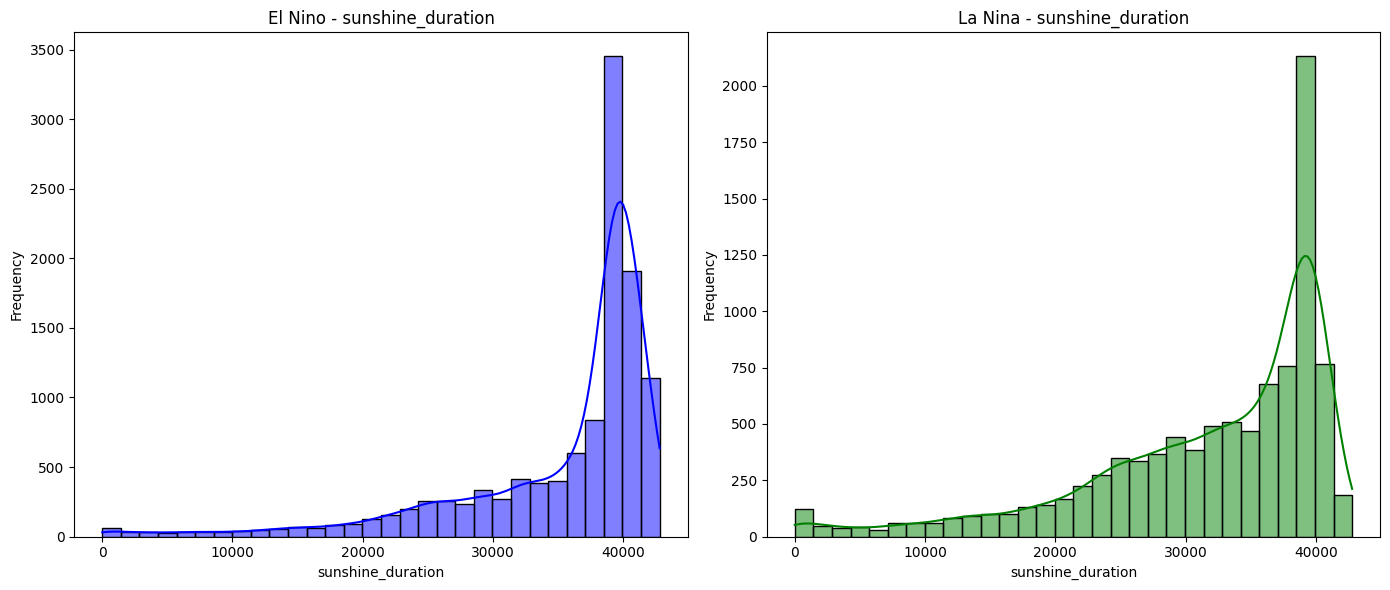

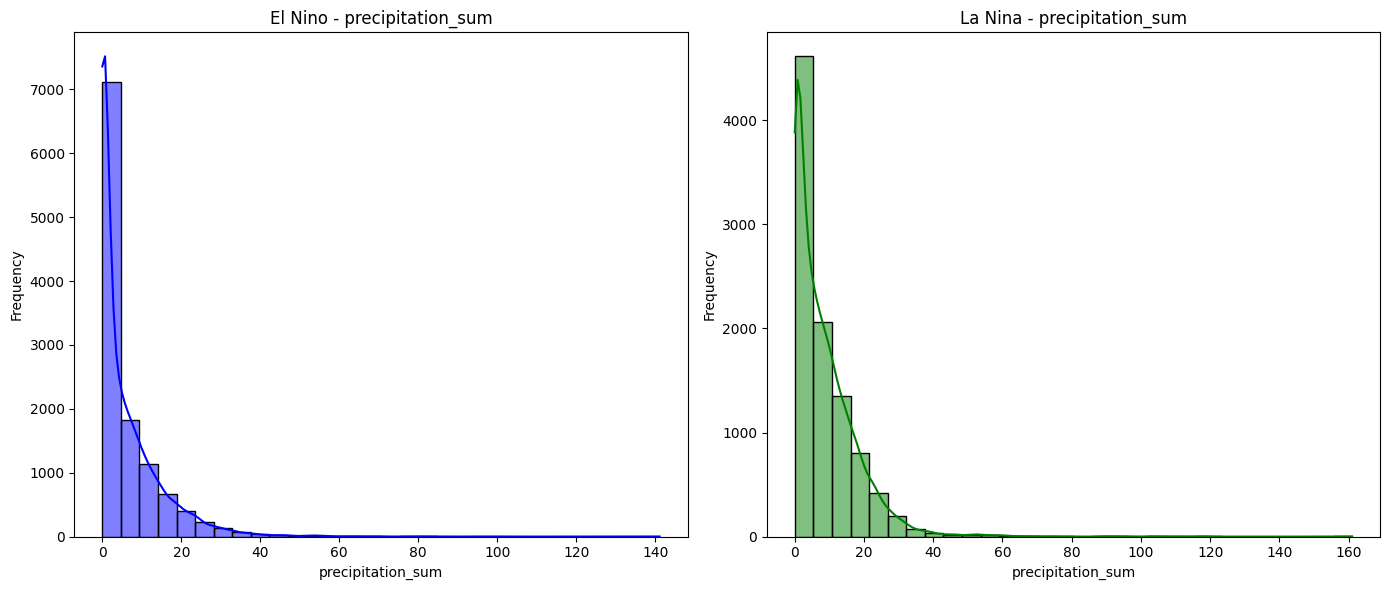

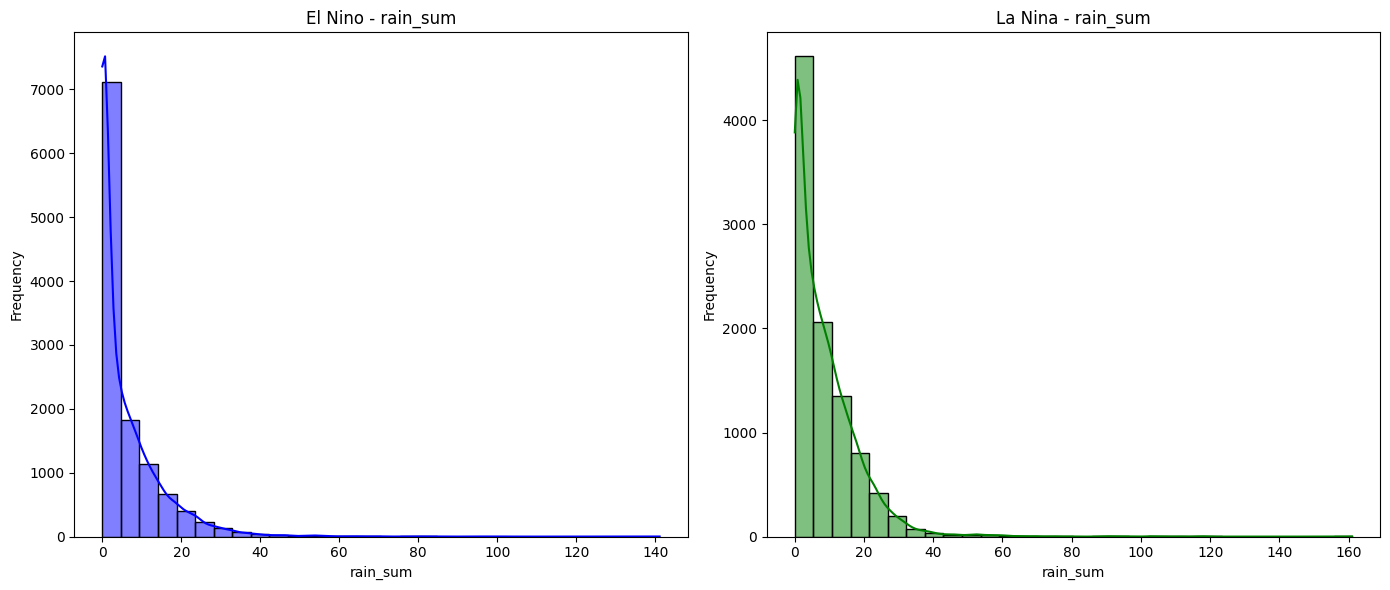

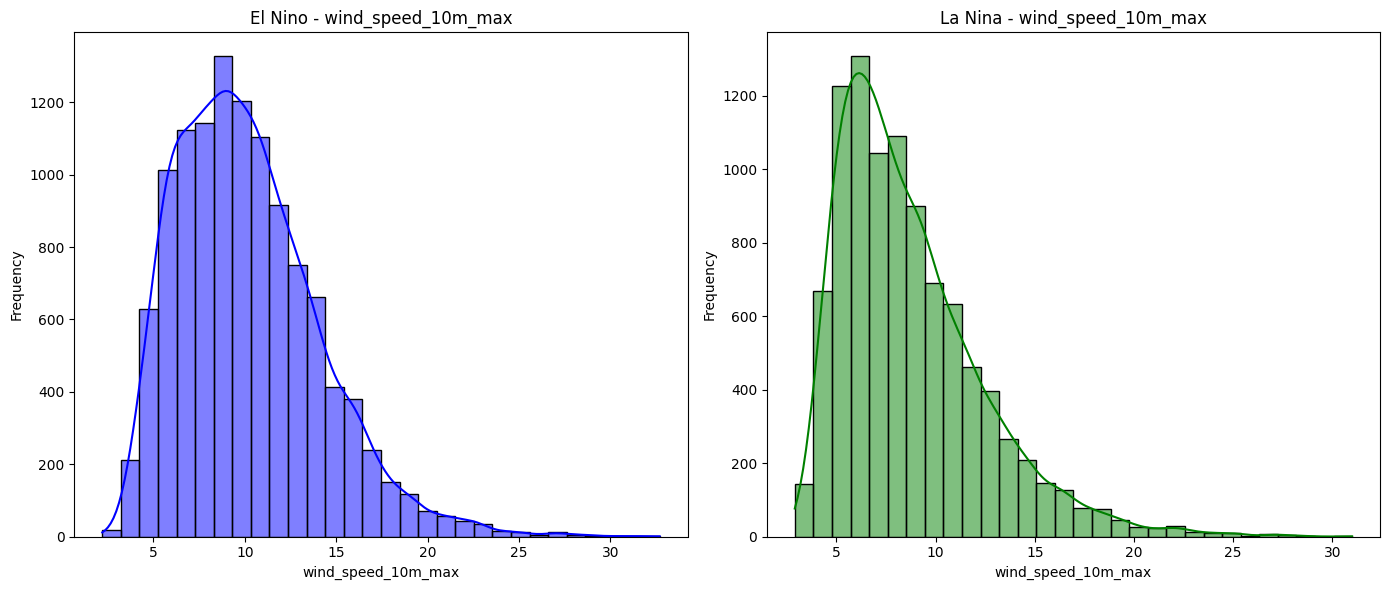

In [ ]:
# Advanced: Visualize each feature separately for each label
for feature in features:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[df['label'] == 'el nino'][feature], kde=True, bins=30, color='blue')
    plt.title(f"El Nino - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.histplot(df[df['label'] == 'la nina'][feature], kde=True, bins=30, color='green')
    plt.title(f"La Nina - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

#PreProcessing

###Missing Value

In [ ]:
features = ['temperature_2m_max', 'temperature_2m_mean', 'sunshine_duration',
            'precipitation_sum', 'rain_sum', 'wind_speed_10m_max']

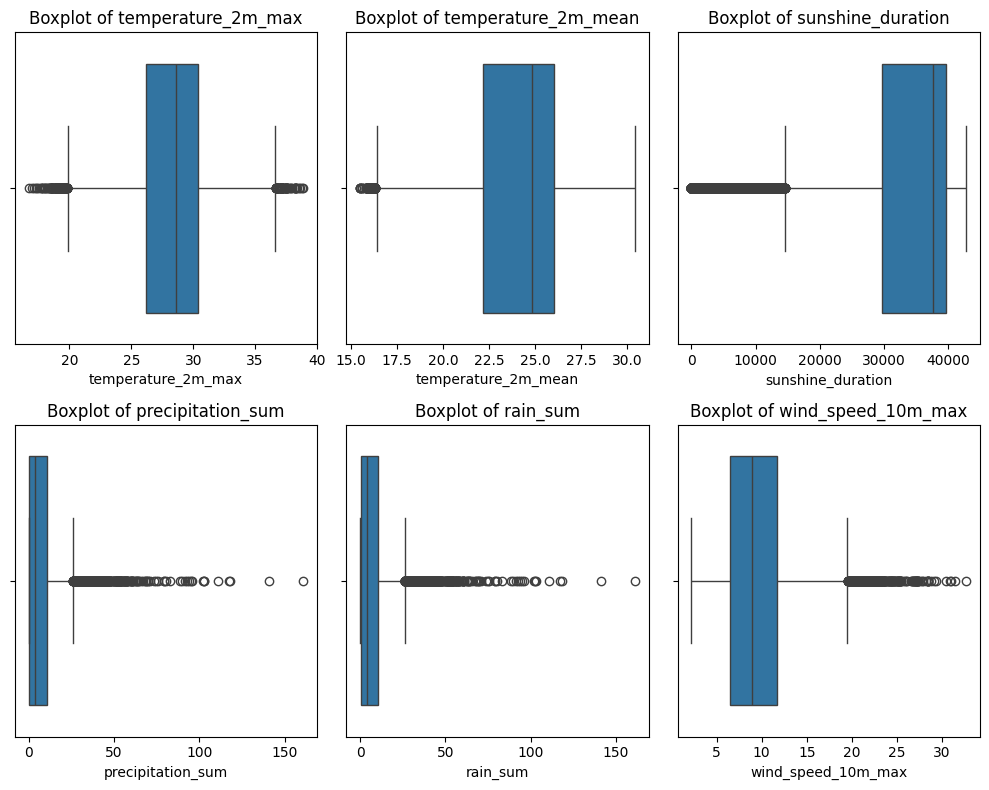

In [ ]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: Found {len(outliers)} outliers")

temperature_2m_max: Found 223 outliers
temperature_2m_mean: Found 100 outliers
sunshine_duration: Found 1077 outliers
precipitation_sum: Found 801 outliers
rain_sum: Found 801 outliers
wind_speed_10m_max: Found 388 outliers


In [ ]:
df['label_encoded'] = df['label'].map({'la nina': 0, 'el nino': 1})
df.head()

,weather_code,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max,label,label_encoded
0,63.0,31.0,24.9,33224.84,20.6,20.6,16.3,la nina,0
1,65.0,30.2,25.1,22994.60,10.9,10.9,13.0,la nina,0
2,53.0,30.1,25.5,27612.70,1.7,1.7,8.7,la nina,0
3,63.0,29.1,25.4,20388.78,6.9,6.9,9.9,la nina,0
4,63.0,30.4,25.3,35931.55,11.4,11.4,7.4,la nina,0


In [ ]:
df.drop('label', axis=1, inplace=True)
df.head()

,weather_code,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max,label_encoded
0,63.0,31.0,24.9,33224.84,20.6,20.6,16.3,0
1,65.0,30.2,25.1,22994.60,10.9,10.9,13.0,0
2,53.0,30.1,25.5,27612.70,1.7,1.7,8.7,0
3,63.0,29.1,25.4,20388.78,6.9,6.9,9.9,0
4,63.0,30.4,25.3,35931.55,11.4,11.4,7.4,0


In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 weather_code           0
temperature_2m_max     0
temperature_2m_mean    0
sunshine_duration      0
precipitation_sum      0
rain_sum               0
wind_speed_10m_max     0
label_encoded          0
dtype: int64


In [ ]:
df.head()

,weather_code,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max,label_encoded
0,63.0,31.0,24.9,33224.84,20.6,20.6,16.3,0
1,65.0,30.2,25.1,22994.60,10.9,10.9,13.0,0
2,53.0,30.1,25.5,27612.70,1.7,1.7,8.7,0
3,63.0,29.1,25.4,20388.78,6.9,6.9,9.9,0
4,63.0,30.4,25.3,35931.55,11.4,11.4,7.4,0


### Correlation heatmap

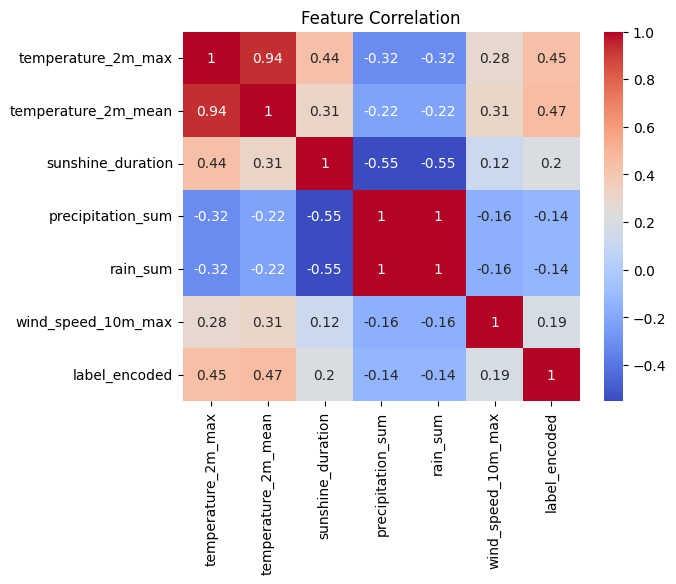

In [ ]:
correlation_matrix = df[features + ['label_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Pairplot for feature interactions

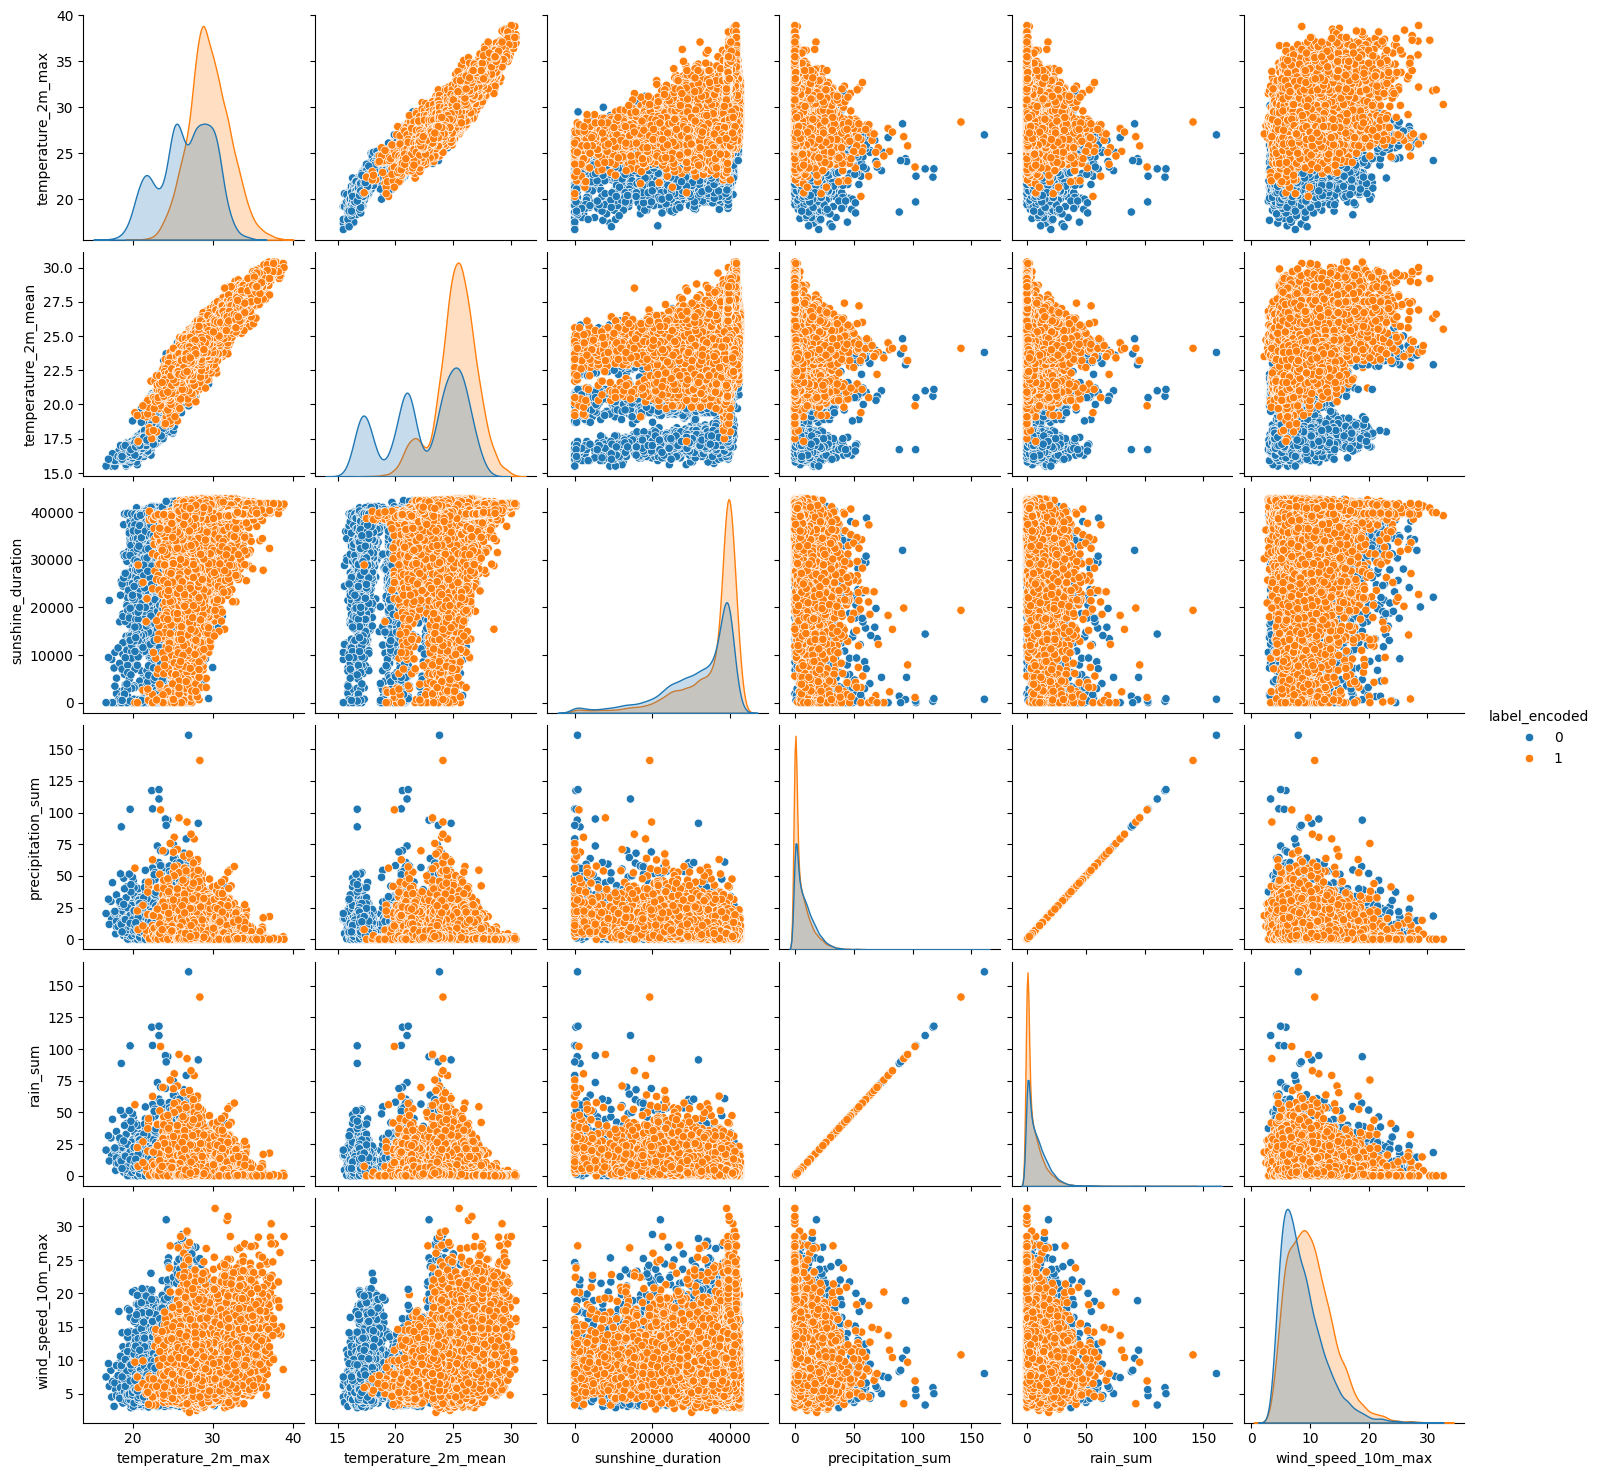

In [ ]:
sns.pairplot(df[features + ['label_encoded']], hue='label_encoded')
plt.show()

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[features]
y = df['label_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [ ]:
X_train.head()

,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max
10010,0.662162,0.731544,0.931230,0.000000,0.000000,0.539249
3698,0.216216,0.100671,0.595439,0.104348,0.104348,0.098976
6897,0.518018,0.456376,0.952670,0.002484,0.002484,0.170648
3451,0.342342,0.174497,0.925472,0.004969,0.004969,0.208191
5034,0.608108,0.597315,0.932610,0.000000,0.000000,0.511945


In [ ]:
X_test.head()

,temperature_2m_max,temperature_2m_mean,sunshine_duration,precipitation_sum,rain_sum,wind_speed_10m_max
20377,0.689189,0.744966,0.873906,0.003106,0.003106,0.607509
369,0.495495,0.624161,0.820456,0.003106,0.003106,0.501706
18933,0.608108,0.697987,0.756787,0.061491,0.061491,0.153584
14040,0.486486,0.536913,0.909150,0.000000,0.000000,0.320819
18627,0.635135,0.758389,0.920707,0.014286,0.014286,0.122867


#Modelling

In [ ]:
# !pip install scikit-learn==1.2.2

In [ ]:
# Helper function to evaluate models
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV

def evaluate_model(model, X_test, y_test, model_name, ax=None, color=None):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} ROC AUC: {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot ROC Curve
    if ax:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', lw=2, color=color)

    return accuracy, roc_auc

In [ ]:
# Initialize plot
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'cyan', 'magenta']
results = []

<Figure size 1000x800 with 0 Axes>

###Model 1: Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

param_dist_logreg = {
    'C': np.logspace(-3, 3, 5),  # Reduced range
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [200, 500]
}


Training Logistic Regression...
Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 200, 'C': 0.03162277660168379}

Logistic Regression Accuracy: 0.6935
Logistic Regression ROC AUC: 0.7477
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.54      0.62      1927
           1       0.68      0.82      0.75      2334

    accuracy                           0.69      4261
   macro avg       0.70      0.68      0.68      4261
weighted avg       0.70      0.69      0.69      4261

Confusion Matrix:
 [[1045  882]
 [ 424 1910]]


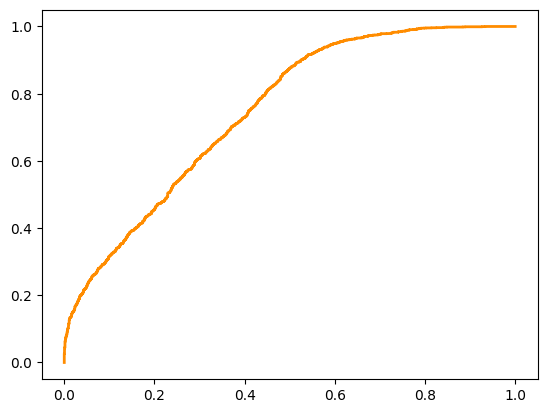

In [ ]:
logreg = LogisticRegression()
logreg_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_dist_logreg, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining Logistic Regression...")
logreg_search.fit(X_train, y_train)
best_logreg = logreg_search.best_estimator_
print("Best Parameters for Logistic Regression:", logreg_search.best_params_)
results.append(("Logistic Regression", *evaluate_model(best_logreg, X_test, y_test, "Logistic Regression", ax=plt.gca(), color=colors[0])))

###Model 2: Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],  # Reduced range
    'min_samples_split': [2, 5]
}


Training Random Forest...
Best Parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 20}

Random Forest Accuracy: 0.7329
Random Forest ROC AUC: 0.8226
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1927
           1       0.73      0.81      0.77      2334

    accuracy                           0.73      4261
   macro avg       0.73      0.72      0.73      4261
weighted avg       0.73      0.73      0.73      4261

Confusion Matrix:
 [[1222  705]
 [ 433 1901]]


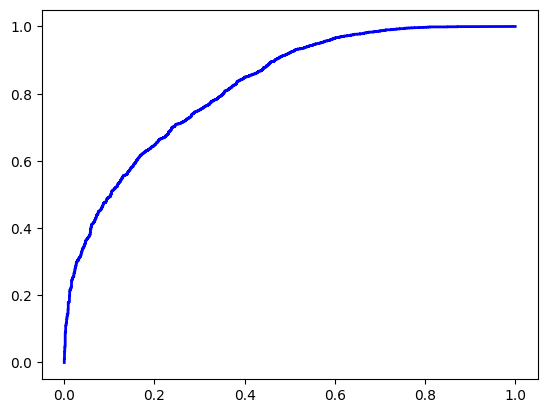

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining Random Forest...")
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Best Parameters for Random Forest:", rf_search.best_params_)
results.append(("Random Forest (Tuned)", *evaluate_model(best_rf, X_test, y_test, "Random Forest", ax=plt.gca(), color=colors[1])))

###Model 3: XGBoost

In [ ]:
# XGBoost
from xgboost import XGBClassifier

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}


Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}

XGBoost Accuracy: 0.7418
XGBoost ROC AUC: 0.8270
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.69      1927
           1       0.74      0.82      0.78      2334

    accuracy                           0.74      4261
   macro avg       0.74      0.73      0.74      4261
weighted avg       0.74      0.74      0.74      4261

Confusion Matrix:
 [[1252  675]
 [ 425 1909]]


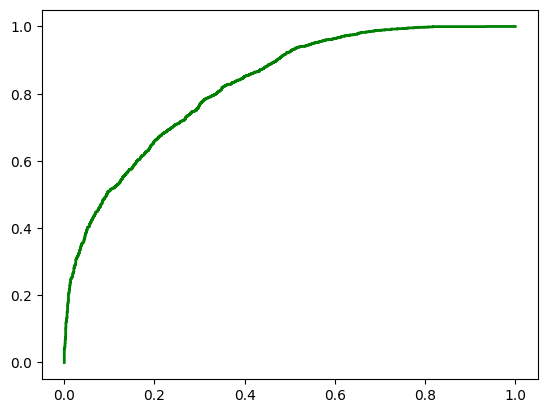

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining XGBoost...")
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Best Parameters for XGBoost:", xgb_search.best_params_)
results.append(("XGBoost", *evaluate_model(best_xgb, X_test, y_test, "XGBoost", ax=plt.gca(), color=colors[2])))

###Model 4: Support Vector Classifier (SVC)

In [ ]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

param_dist_svc = {
    'C': [0.01, 0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3]
}


Training Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'kernel': 'rbf', 'degree': 2, 'C': 1.0}

Support Vector Classifier Accuracy: 0.7179
Support Vector Classifier ROC AUC: 0.7621
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.48      0.60      1927
           1       0.68      0.92      0.78      2334

    accuracy                           0.72      4261
   macro avg       0.75      0.70      0.69      4261
weighted avg       0.75      0.72      0.70      4261

Confusion Matrix:
 [[ 918 1009]
 [ 193 2141]]


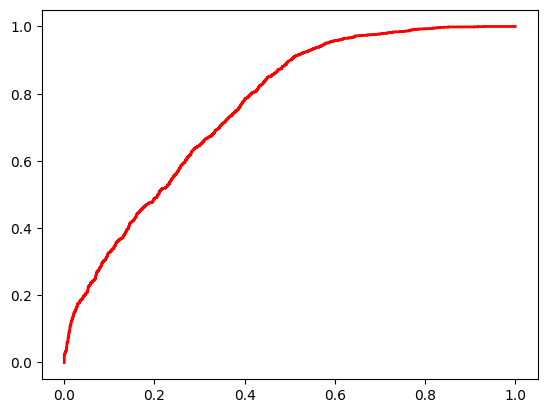

In [ ]:
svc = SVC(probability=True)
svc_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist_svc, n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)
print("\nTraining Support Vector Classifier...")
svc_search.fit(X_train, y_train)
best_svc = svc_search.best_estimator_
print("Best Parameters for Support Vector Classifier:", svc_search.best_params_)
results.append(("Support Vector Classifier", *evaluate_model(best_svc, X_test, y_test, "Support Vector Classifier", ax=plt.gca(), color=colors[3])))

###Model 5: Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

param_dist_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


Training Gradient Boosting Classifier...
Best Parameters for Gradient Boosting Classifier: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}

Gradient Boosting Classifier Accuracy: 0.7327
Gradient Boosting Classifier ROC AUC: 0.8246
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.58      0.66      1927
           1       0.71      0.86      0.78      2334

    accuracy                           0.73      4261
   macro avg       0.74      0.72      0.72      4261
weighted avg       0.74      0.73      0.73      4261

Confusion Matrix:
 [[1112  815]
 [ 324 2010]]


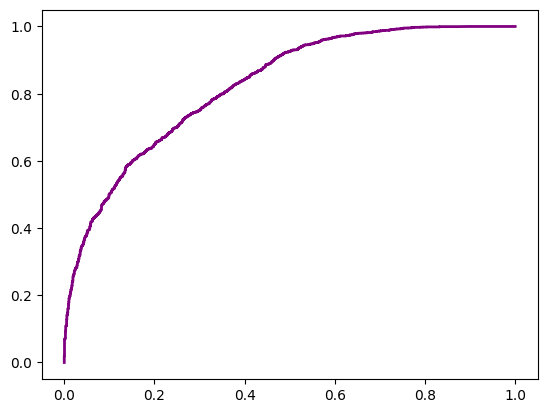

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist_gbc, scoring='accuracy', cv=5)
print("\nTraining Gradient Boosting Classifier...")
gbc_search.fit(X_train, y_train)
best_gbc = gbc_search.best_estimator_
print("Best Parameters for Gradient Boosting Classifier:", gbc_search.best_params_)
results.append(("Gradient Boosting Classifier", *evaluate_model(best_gbc, X_test, y_test, "Gradient Boosting Classifier", ax=plt.gca(), color=colors[4])))

###Model 6: Voting Classifier

In [ ]:
# Add Voting Classifier
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Voting Classifier Accuracy: 0.7285
Voting Classifier ROC AUC: 0.8181
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.54      0.64      1927
           1       0.70      0.88      0.78      2334

    accuracy                           0.73      4261
   macro avg       0.75      0.71      0.71      4261
weighted avg       0.74      0.73      0.72      4261

Confusion Matrix:
 [[1050  877]
 [ 280 2054]]


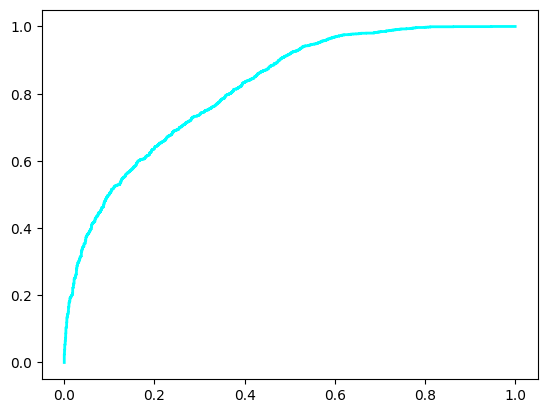

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg), ('rf', best_rf), ('xgb', best_xgb), ('svc', best_svc)
], voting='soft')
voting_clf.fit(X_train, y_train)
results.append(("Voting Classifier", *evaluate_model(voting_clf, X_test, y_test, "Voting Classifier", ax=plt.gca(), color=colors[5])))

###Model 7: Bagging Classifier

In [ ]:
# Add Bagging Classifier
from sklearn.ensemble import BaggingClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used


Bagging Classifier Accuracy: 0.7407
Bagging Classifier ROC AUC: 0.8308
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      1927
           1       0.73      0.83      0.78      2334

    accuracy                           0.74      4261
   macro avg       0.74      0.73      0.73      4261
weighted avg       0.74      0.74      0.74      4261

Confusion Matrix:
 [[1228  699]
 [ 406 1928]]


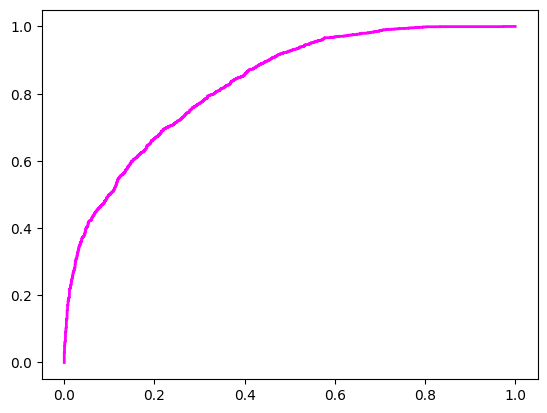

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=best_xgb, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
results.append(("Bagging Classifier", *evaluate_model(bagging_clf, X_test, y_test, "Bagging Classifier", ax=plt.gca(), color=colors[6])))

###Model 8: Stacking Classifier

In [ ]:
# Add Stacking Classifier
from sklearn.ensemble import StackingClassifier

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Stacking Classifier Accuracy: 0.7318
Stacking Classifier ROC AUC: 0.8263
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1927
           1       0.73      0.81      0.77      2334

    accuracy                           0.73      4261
   macro avg       0.73      0.72      0.73      4261
weighted avg       0.73      0.73      0.73      4261

Confusion Matrix:
 [[1232  695]
 [ 448 1886]]


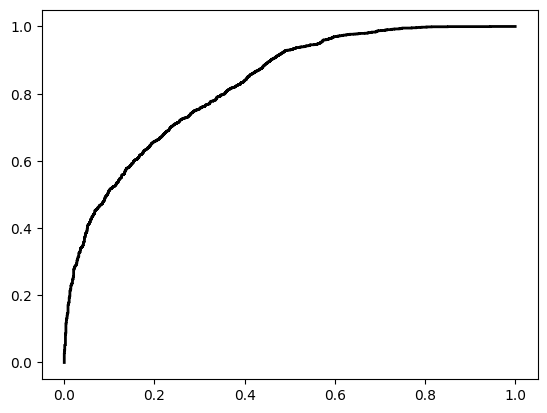

In [ ]:
stacking_clf = StackingClassifier(estimators=[
    ('logreg', best_logreg), ('rf', best_rf), ('xgb', best_xgb)
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
results.append(("Stacking Classifier", *evaluate_model(stacking_clf, X_test, y_test, "Stacking Classifier", ax=plt.gca(), color='black')))

###Plot

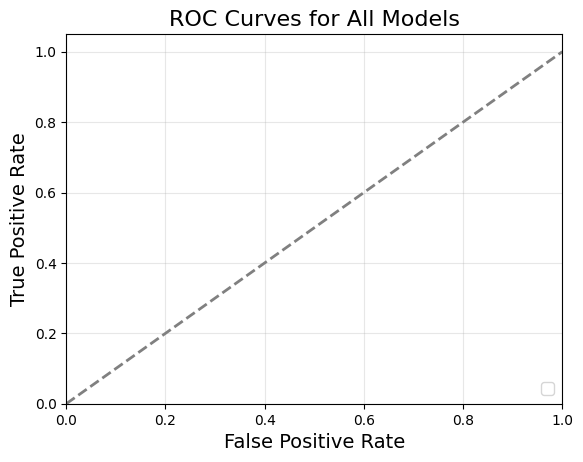

In [ ]:
# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Reference diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

###Summary

In [ ]:
# Print summary of results
print("\nSummary of Model Performance:")
for model_name, accuracy, roc_auc in results:
    print(f"{model_name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}")
    if model_name == "Logistic Regression":
        print("Best Hyperparameters for Logistic Regression:", logreg_search.best_params_)
    elif model_name == "Random Forest (Tuned)":
        print("Best Hyperparameters for Random Forest:", rf_search.best_params_)
    elif model_name == "XGBoost":
        print("Best Hyperparameters for XGBoost:", xgb_search.best_params_)
    elif model_name == "Support Vector Classifier":
        print("Best Hyperparameters for Support Vector Classifier:", svc_search.best_params_)
    elif model_name == "Gradient Boosting Classifier":
        print("Best Hyperparameters for Gradient Boosting Classifier:", gbc_search.best_params_)
    print("\n")


Summary of Model Performance:
Logistic Regression: Accuracy = 0.6935, ROC AUC = 0.7477
Best Hyperparameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 200, 'C': 0.03162277660168379}


Random Forest (Tuned): Accuracy = 0.7329, ROC AUC = 0.8226
Best Hyperparameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 20}


XGBoost: Accuracy = 0.7418, ROC AUC = 0.8270
Best Hyperparameters for XGBoost: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}


Support Vector Classifier: Accuracy = 0.7179, ROC AUC = 0.7621
Best Hyperparameters for Support Vector Classifier: {'kernel': 'rbf', 'degree': 2, 'C': 1.0}


Gradient Boosting Classifier: Accuracy = 0.7327, ROC AUC = 0.8246
Best Hyperparameters for Gradient Boosting Classifier: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}


Voting Classifier: Accuracy = 0.7285, ROC AUC = 0.8181


Bagging Classifier: Accuracy = 0.7407, ROC AUC = 0.8308


Stacking Classifier: Accuracy = 0.7318, 